# Yolo inference with heat map generation
## Imports

In [8]:
from matplotlib.pyplot import imshow
import os
import cv2
import random
import numpy as np
from datetime import datetime
from CellDetector import CellDetector
import matplotlib.pyplot as plt
%matplotlib inline

## Load model

In [9]:
cell_detector = CellDetector("02_23_all_data_ft.pt")

## Load data

In [10]:
DEATH_TYPE = "Necroptosis"
CELL_TYPE = "HT29"
base_dir = "/Users/sapplab/Desktop/CellDataProcessing/new_data/" + DEATH_TYPE + "/"
images_dir = base_dir + CELL_TYPE + "_phase/"
green_dir = base_dir + CELL_TYPE + "_Green/"
results_dir = "/Users/sapplab/Desktop/CellDataProcessing/test_images/"
images = os.listdir(images_dir)
len_images = len(images)

In [11]:
image_id = random.randrange(len_images)
image_id = 112
print(image_id)
source = images_dir + images[image_id]
source_green = green_dir + images[image_id]
print(source)

img = cv2.imread(source, cv2.IMREAD_UNCHANGED)

img_green = cv2.imread(source_green, cv2.IMREAD_UNCHANGED)
img_green = cv2.convertScaleAbs(img_green, alpha=(255.0/65535.0))
img_green = cv2.addWeighted(img_green, 8.7, np.zeros(img_green.shape, img_green.dtype), 0, 0.0)

112
/Users/sapplab/Desktop/CellDataProcessing/new_data/Necroptosis/HT29_phase/VID849_C4_6_00d08h00m.png


## Predict

In [12]:
results, big_image = cell_detector.predict_with_heatmap(img, 0.2, 0.4, withImage = True)
print(np.shape(results))

13162

0: 128x128 3 necroptosiss, 36.9ms
Speed: 0.3ms preprocess, 36.9ms inference, 0.4ms postprocess per image at shape (1, 3, 128, 128)
[[20, 39, 45, 64, 1], [39, 77, 58, 96, 1], [25, 68, 60, 103, 1]]
[[89, 20, 64, 45, 1], [51, 39, 32, 58, 1], [60, 25, 25, 60, 1]]

0: 128x128 3 necroptosiss, 34.9ms
Speed: 0.4ms preprocess, 34.9ms inference, 0.4ms postprocess per image at shape (1, 3, 128, 128)
[[74, 118, 88, 128, 1], [80, 72, 97, 90, 1], [89, 88, 99, 98, 1]]
[[53, 10, 39, 0, 1], [48, 56, 31, 38, 1], [39, 40, 28, 30, 1]]

0: 128x128 3 necroptosiss, 34.5ms
Speed: 0.4ms preprocess, 34.5ms inference, 0.4ms postprocess per image at shape (1, 3, 128, 128)
[[70, 28, 89, 46, 1], [118, 38, 128, 52, 1], [88, 61, 111, 84, 1]]
[[28, 58, 45, 39, 1], [37, 10, 51, 0, 1], [60, 40, 83, 16, 1]]

0: 128x128 5 necroptosiss, 35.3ms
Speed: 0.2ms preprocess, 35.3ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 128)
[[31, 40, 49, 58, 1], [23, 25, 62, 63, 1], [40, 0, 55, 12, 1], [36, 30, 52, 46

## Visualize

In [13]:
IF_GREEN = True

if IF_GREEN:
    image_boxed, image_green_boxed = cell_detector.box_image(big_image, results, image_green = img_green, prepare_type = 1)
else:
    image_boxed = cell_detector.box_image(big_image, results)

Text(0.5, 1.0, 'Green')

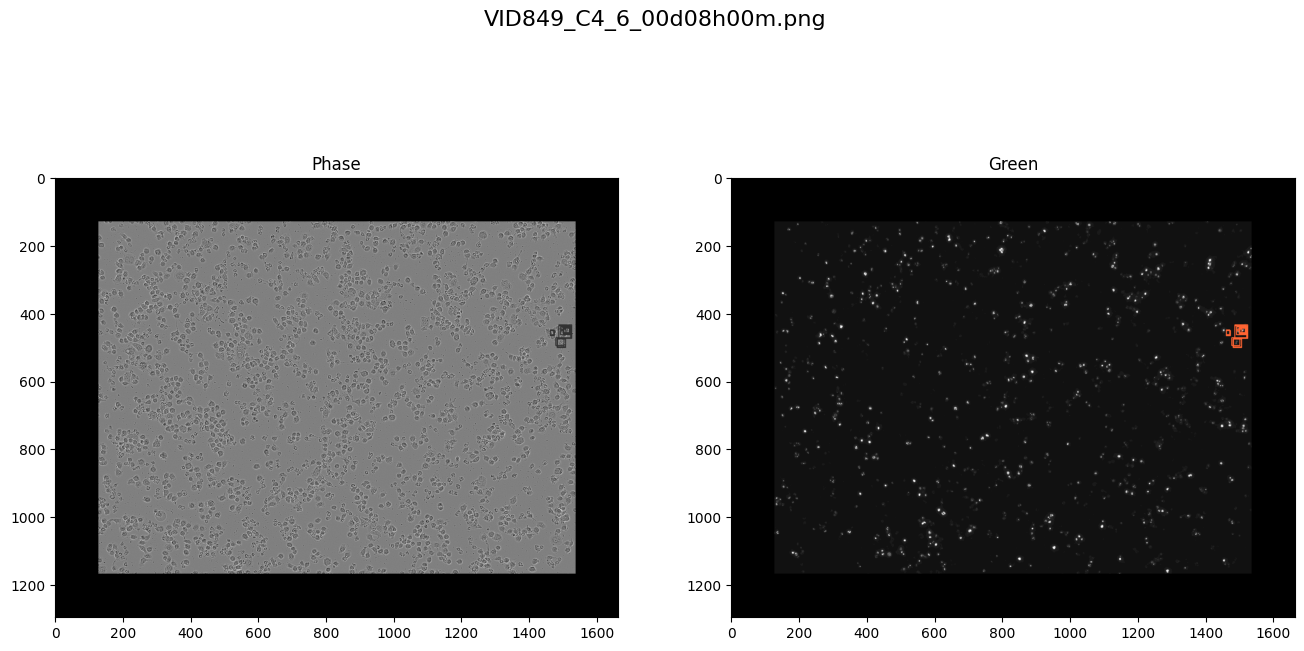

In [14]:
fig, ((ax1),(ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
fig.suptitle(str(images[image_id]), fontsize=16)

image_boxed = cv2.cvtColor(image_boxed, cv2.COLOR_BGR2RGB)

image_green_boxed = cv2.cvtColor(image_green_boxed, cv2.COLOR_BGR2RGB)


ax1.imshow(image_boxed)
ax1.set_title("Phase")

ax2.imshow(image_green_boxed)
ax2.set_title("Green")